In [5]:
import sys
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import re

### Load sample image

In [8]:
def load_image(path):
    return np.array(Image.open(path).convert("RGB"))

test_img = load_image("../data/inputs/rainy_scene.jpg")
derained_img = load_image("../data/derained/derained_rainy_scene.jpg")
detected_heatmap = load_image("../data/detected/res_derained_rainy_scene_mask.jpg")
bounding_box_img = load_image("../data/detected/res_derained_rainy_scene.jpg")

text = []

with open("../data/output/results.txt", "r") as f:
    for line in f:
        match = re.search(r"Recognized text:\s*([A-Z0-9 ]+)", line)
        if match:
            text.append(match.group(1).strip())

### Display results

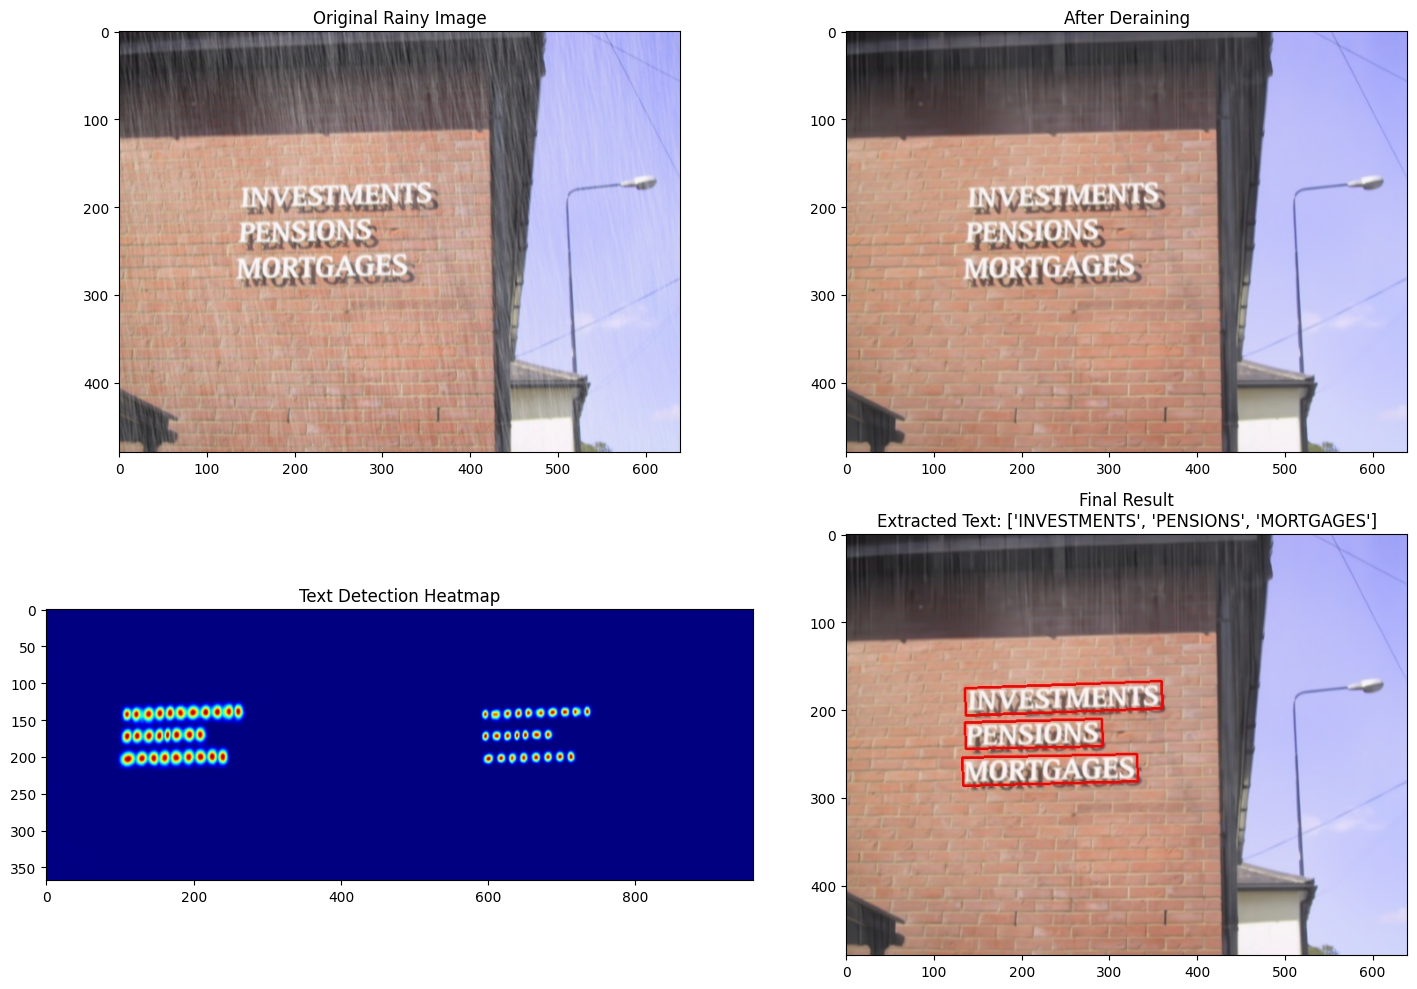

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].imshow(test_img)
axes[0,0].set_title("Original Rainy Image")

axes[0,1].imshow(derained_img)
axes[0,1].set_title("After Deraining")

axes[1,0].imshow(detected_heatmap)
axes[1,0].set_title("Text Detection Heatmap")

axes[1,1].imshow(bounding_box_img)
axes[1,1].set_title(f"Final Result\nExtracted Text: {text}")

plt.tight_layout()
plt.show()